# **Introduction to Hypothesis Testing Part - 2**

# **Parametric Test**

- `Parametric` tests assume that the data being analyzed follows a normal distribution, has equal variances.

- `Non-parametric` tests,do not make assumptions about the data distribution and are often considered less powerful compared to parametric tests, but they are `more robust to violations` of assumptions and can be used with smaller sample sizes or when data are not normally distributed.

- 🟥`Parametric` tests are sensitive to violations of their assumptions. If the assumptions are not met, the results may be biased or invalid. For example:
    - 👉 if the data do not follow a normal distribution or
    - 👉 if sample sizes are small, parametric tests may produce inaccurate results.

- `Parametric` tests are generally more powerful (i.e., have higher statistical power) compared to `non-parametric` tests when the assumptions are met, **as they can detect smaller effects with smaller sample sizes**.

-  Parametric tests are based on estimating population parameters, such as means or `variances`, using `sample data`. 

- Examples of `parametric` tests include -
    - 🔹`t-tests` 
    - 🔹`analysis of variance (ANOVA)`
    - 🔹`linear regression`.


- `Significance levels` (often denoted as alpha, `α`) in `parametric` tests represent the probability of obtaining a statistically significant result by chance alone, assuming the null hypothesis is true. Commonly used significance levels are `0.05` or `0.01`, which indicate a `5%` or `1%` chance, respectively, of obtaining a significant result by chance.

- `Parametric` require larger sample sizes compared to `non-parametric` tests and are commonly used when assumptions are met.

- While `non-parametric` tests are used when assumptions are not met or with smaller sample sizes.

>**The choice between parametric and non-parametric tests depends on the characteristics of the data and research question**.

## **T-test**

|Test Type| Description| Sample Source|
|---------|------------|--------------|
| One-Sample t-test | Used to determine if the mean of a single sample is significantly different from a known or hypothesized population mean | Single sample, compared to known/hypothesized value |
| Independent-Sample t-test | Used to compare the means of two independent groups or samples | Two separate, independent samples from different sources |
| Paired t-test | Used to compare the means of two related or paired groups or samples | Paired samples from the same source at different time intervals |



### `scipy` $\rightarrow$ `stats` $\rightarrow$ `ttest_1samp` (**One Sample T - Test**)

In [1]:
#Scores of me and Virat
my_marks = [51, 61, 43, 49, 59, 55, 66, 60, 51, 95]
topper_marks = [82, 73, 96, 75, 68, 71, 83, 65, 59, 68]

In [2]:
#Lets check mean of our scores
import numpy as np 

print('My mean score:', np.mean(my_marks))
print('Topper mean score:', np.mean(topper_marks))

My mean score: 59.0
Topper mean score: 74.0


Testing if my `mean score marks is ` `0`?

In [3]:
#One Sample T-test
import scipy.stats as stats

# Perform one-sample t-test
null_hypo = 0  # Null hypothesis: population mean is 0
alpha = 0.05   # Significance level

t_stat, p_value = stats.ttest_1samp(my_marks, null_hypo)
print(f"t_stat = {t_stat}, p_value = {p_value}")

# Check for significance
if p_value < alpha:
    print("Result: Reject Null Hypothesis")
else:
    print("Result: Fail to Reject Null Hypothesis")

t_stat = 13.013298811060398, p_value = 3.8490409085887306e-07
Result: Reject Null Hypothesis


As the `P-value` is very small, there is substantial evidence `against` the null hypothesis, So we reject the null hypothesis and accepte the alternate hypothesis

>which proposes that there is a statistically `significant difference between the means` or  relationship or effect present in the data.

Testing if my `mean score marks is ` `49`?

In [4]:
#One Sample T-test
import scipy.stats as stats

# Perform one-sample t-test
null_hypo = 49  # Null hypothesis: population mean is 20
alpha = 0.05   # Significance level

t_stat, p_value = stats.ttest_1samp(my_marks, null_hypo)
print(f"t_stat = {t_stat}, p_value = {p_value}")

# Check for significance
if p_value < alpha:
    print("Result: Reject Null Hypothesis")
else:
    print("Result: Fail to Reject Null Hypothesis")

t_stat = 2.2056438662814233, p_value = 0.05483350919895218
Result: Fail to Reject Null Hypothesis


Testing if my mean score marks is `59`?

In [5]:
#One Sample T-test
import scipy.stats as stats

# Perform one-sample t-test
null_hypo = 59  # Null hypothesis: population mean is 20
alpha = 0.05   # Significance level

t_stat, p_value = stats.ttest_1samp(my_marks, null_hypo)
print(f"t_stat = {t_stat}, p_value = {p_value}")

# Check for significance
if p_value < alpha:
    print("Result: Reject Null Hypothesis")
else:
    print("Result: Fail to Reject Null Hypothesis")

t_stat = 0.0, p_value = 1.0
Result: Fail to Reject Null Hypothesis


**Hypothesis Testing** for Different `mean`

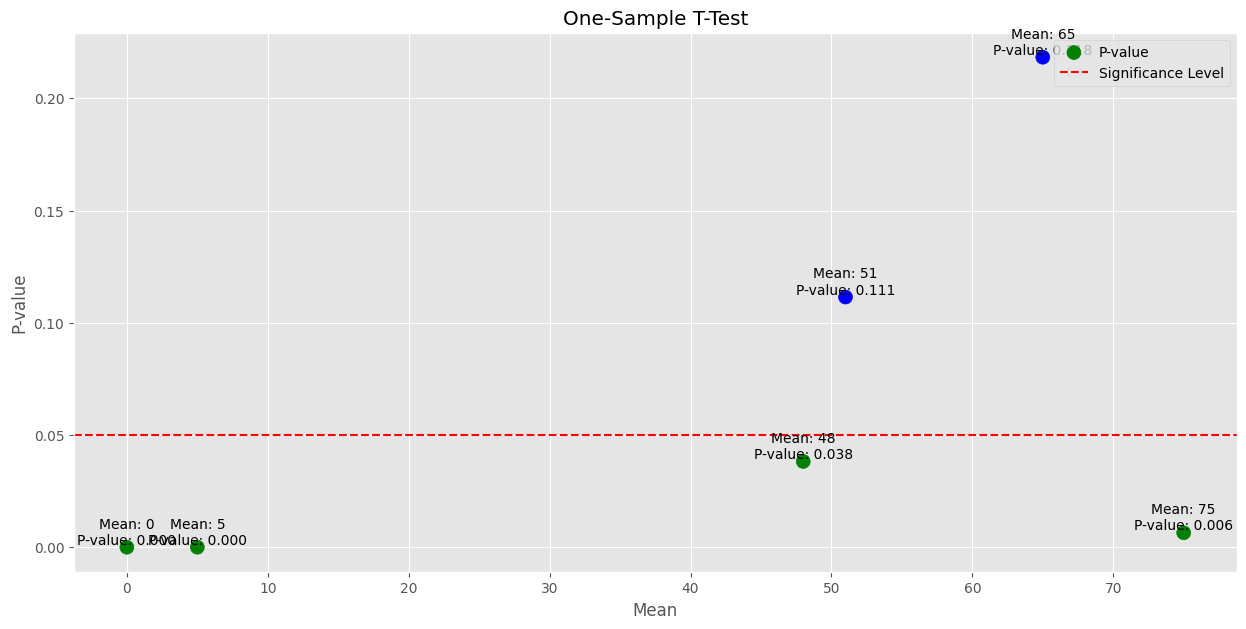

Result for Null Hypothesis 0: Reject Null Hypothesis
Result for Null Hypothesis 48: Reject Null Hypothesis
Result for Null Hypothesis 51: Fail to Reject Null Hypothesis
Result for Null Hypothesis 5: Reject Null Hypothesis
Result for Null Hypothesis 65: Fail to Reject Null Hypothesis
Result for Null Hypothesis 75: Reject Null Hypothesis


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Null hypotheses: population means are 
null_hypo = [0, 48, 51, 5, 65, 75]

# Significance level
alpha = 0.05

# Input data
my_marks = [51, 61, 43, 49, 59, 55, 66, 60, 51, 95]

# Initialize arrays for storing results
t_stats = np.zeros(len(null_hypo))
p_values = np.zeros(len(null_hypo))

# Perform one-sample t-test for each null hypothesis
for i, hypo in enumerate(null_hypo):
    t_stat, p_value = stats.ttest_1samp(my_marks, hypo)
    t_stats[i] = t_stat
    p_values[i] = p_value

# plot size and style
plt.style.use("ggplot")
plt.figure(figsize=(15, 7))

marker_colors = ['g' if p < alpha else 'b' for p in p_values]

# Plot p-values on a graph
plt.scatter(null_hypo, p_values, c=marker_colors, marker='o', s=100, label='P-value')
plt.axhline(alpha, color='r', linestyle='--', label='Significance Level')

# Add mean values as text labels on the scatter plot
for i, hypo in enumerate(null_hypo):
    plt.text(hypo, p_values[i], f"Mean: {hypo}\nP-value: {p_values[i]:.3f}", ha='center', va='bottom')

plt.xlabel('Mean')
plt.ylabel('P-value')
plt.title('One-Sample T-Test')
plt.legend()
plt.grid(True)

plt.show()

# Check for significance for each null hypothesis
for i in range(len(null_hypo)):
    if p_values[i] < alpha:
        print(f"Result for Null Hypothesis {null_hypo[i]}: Reject Null Hypothesis")
    else:
        print(f"Result for Null Hypothesis {null_hypo[i]}: Fail to Reject Null Hypothesis")

In Contex of **hypothesis testing**:

- `Rejecting the Null Hypothesis` means that there is sufficient evidence to support the `Alternative Hypothesis`, indicating that there is a significant difference or relationship between variables.

- `Fail to Reject the Null Hypothesis` means that there is not enough evidence to support the `Alternative Hypothesis`, indicating that any observed difference or relationship may be due to chance or random variation.

- In the context of `vaccine testing:`
    - `Rejecting the null hypothesis` would mean that there is **evidence to support the effectiveness of the vaccine** in preventing or reducing the disease or condition. 
    - `Fail to reject the null hypothesis` would mean that there is not enough evidence to conclude that the vaccine is effective.

### `scipy` $\rightarrow$ `stats` $\rightarrow$ `ttest_ind` (**Independent-Sample t-test**)

> The `Null hypothesis` in this `two-sample t-test` assumes that the `means` of `my_marks` and `topper_marks` are equal. 

In [7]:
my_marks = [23,21,31,20,19,35,26,22,21,19]
topper_marks = [46,42,62,40,38,70,52,44,42,38]

#Two Sample T-test
import scipy.stats as stats

# Perform Two-sample t-test
# The Null hypothesis: mean of my_marks = mean of topper_marks
alpha = 0.05   # Significance level

t_stat, p_value = stats.ttest_ind(my_marks, topper_marks)
print(f"t_stat = {t_stat}, p_value = {p_value}")

# Check for significance
if p_value < alpha:
    print("Result: Reject Null Hypothesis")
else:
    print("Result: Fail to Reject Null Hypothesis")

t_stat = -6.210850679090182, p_value = 7.3390410384768156e-06
Result: Reject Null Hypothesis


- There is a significant evidence against the `Null Hypothesis` `i.e.` there is a difference in `mean` between `my_marks` and `topper_marks`.

- The negative value of `t-statistic` (`-6.210850679090182`) indicates that `my_marks` has a `lower mean` compared to `topper_marks`, based on the sample data provided.

### `scipy` $\rightarrow$ `stats` $\rightarrow$ `ttest_rel` (**Paired t-test**)

This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

In [8]:
# My mark 
my_marks = [23,21,31,20,19,35,26,22,21,19]

# Marks after recheck
my_marks_recheck = [46,42,62,40,38,70,52,44,42,38]

print(np.mean(my_marks))
print(np.mean(my_marks_recheck))

23.7
47.4


Calculate the `t-test` on TWO RELATED samples of scores, `my_marks` and `my_marks_recheck`.



In [9]:
import scipy.stats as stats

alpha = 0.05   # Significance level

t_stat, p_value = stats.ttest_rel(my_marks, my_marks_recheck)
print(f"t_stat = {t_stat}, p_value = {p_value}")

# Check for significance
if p_value < alpha:
    print("Result: Reject Null Hypothesis")
else:
    print("Result: Fail to Reject Null Hypothesis")

t_stat = -13.88788431654638, p_value = 2.1983272300073563e-07
Result: Reject Null Hypothesis


## **ANOVA(`Analysis of variance`)**

>`Assumption` -  `Normal distributon`, `Same Variance`, `Identical Distribution`

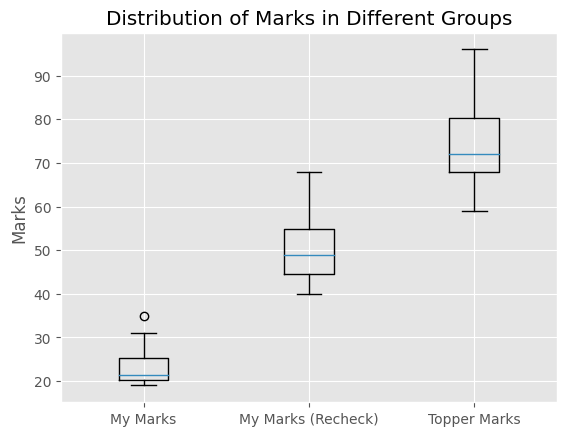

In [10]:
import matplotlib.pyplot as plt

# Data
my_marks = [23,21,31,20,19,35,26,22,21,19]
my_marks_recheck = [40, 44, 60, 50, 48, 68, 55, 46, 44, 54]
topper_marks = [82, 73, 96, 75, 68, 71, 83, 65, 59, 68]

# Create a list of data for plotting
data = [my_marks, my_marks_recheck, topper_marks]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

# Add labels and title
ax.set_xticklabels(['My Marks', 'My Marks (Recheck)', 'Topper Marks'])
ax.set_ylabel('Marks')
ax.set_title('Distribution of Marks in Different Groups')

# Show the plot
plt.show()

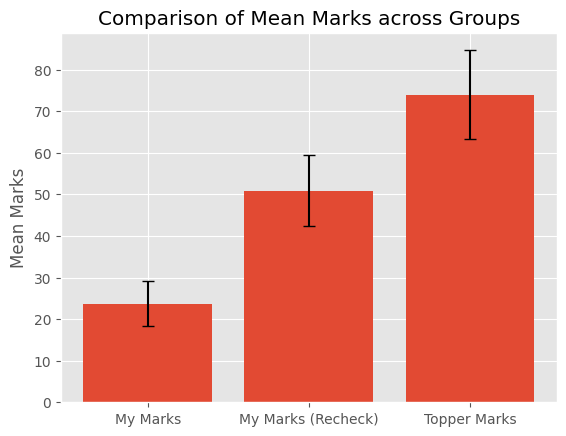

In [11]:
import matplotlib.pyplot as plt

# Data
my_marks = [23,21,31,20,19,35,26,22,21,19]
my_marks_recheck = [40, 44, 60, 50, 48, 68, 55, 46, 44, 54]
topper_marks = [82, 73, 96, 75, 68, 71, 83, 65, 59, 68]

# Calculate means and standard deviations
mean_my_marks = sum(my_marks) / len(my_marks)
mean_my_marks_recheck = sum(my_marks_recheck) / len(my_marks_recheck)
mean_topper_marks = sum(topper_marks) / len(topper_marks)

std_my_marks = stats.tstd(my_marks)
std_my_marks_recheck = stats.tstd(my_marks_recheck)
std_topper_marks = stats.tstd(topper_marks)

# Create a bar plot
fig, ax = plt.subplots()

ax.bar(['My Marks', 'My Marks (Recheck)', 'Topper Marks'],
       [mean_my_marks, mean_my_marks_recheck, mean_topper_marks],
       yerr=[std_my_marks, std_my_marks_recheck, std_topper_marks],
       capsize=4)

ax.set_ylabel('Mean Marks')
ax.set_title('Comparison of Mean Marks across Groups')
plt.show()

The One-Way ANOVA test is used to determine whether there is a `statistically significant` difference in the `means` of the marks among the three groups.

-  The `Null Hypothesis` is that there is `NO` difference in the means of the groups, and
-  The `Alternative Hypothesis` is that there is a `significant difference` in at least one of the group means.

ANOVA Test Results:
------------------------------
t-statistic: 88.7295489891137
p-value: 1.349658424433886e-12
Significance level (alpha): 0.05
------------------------------
Result: Reject Null Hypothesis


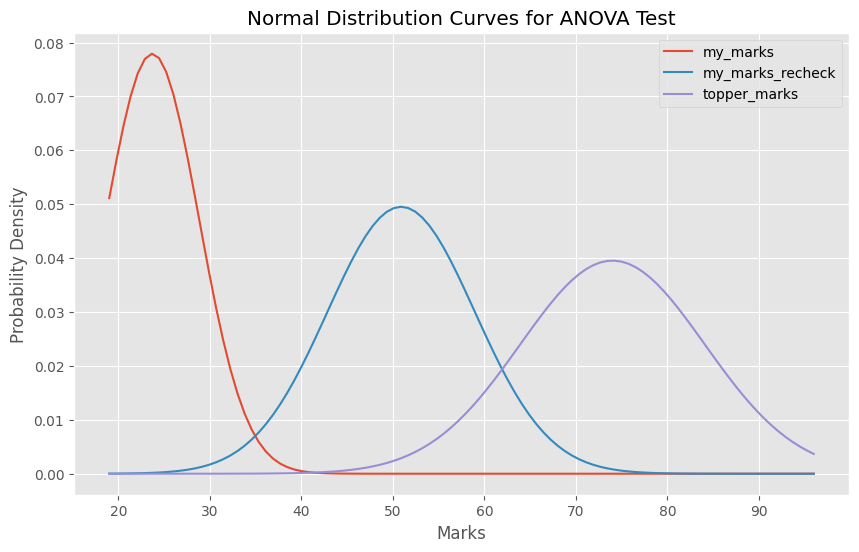

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Data
my_marks = [23,21,31,20,19,35,26,22,21,19]
my_marks_recheck = [40, 44, 60, 50, 48, 68, 55, 46, 44, 54]
topper_marks = [82, 73, 96, 75, 68, 71, 83, 65, 59, 68]

# Perform ANOVA test
alpha = 0.05   # Significance level
t_stat, p_value = stats.f_oneway(my_marks, my_marks_recheck, topper_marks)

# Print results
print(f"ANOVA Test Results:")
print("-"*30)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Significance level (alpha): {alpha}")
print("-"*30)

# Check for significance
if p_value < alpha:
    print("Result: Reject Null Hypothesis")
else:
    print("Result: Fail to Reject Null Hypothesis")

# Plot normal distribution curves
plt.figure(figsize=(10, 6))
x = np.linspace(min(my_marks + my_marks_recheck + topper_marks), max(my_marks + my_marks_recheck + topper_marks), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(my_marks), np.std(my_marks)), label='my_marks')
plt.plot(x, stats.norm.pdf(x, np.mean(my_marks_recheck), np.std(my_marks_recheck)), label='my_marks_recheck')
plt.plot(x, stats.norm.pdf(x, np.mean(topper_marks), np.std(topper_marks)), label='topper_marks')
plt.legend()
plt.title('Normal Distribution Curves for ANOVA Test')
plt.xlabel('Marks')
plt.ylabel('Probability Density')
plt.show()

# **Non-Parametric** 

> Does `Not` assume any form of distribution unlike `Parametric`.



## `Mann-Whitney U Test` 

- Tests whether the distributions of two or more independent samples are equal or not(i.e. they have similar distribution or not).

> `Assumptions` - `Idential distribution`, `observations can be ranked`

In [13]:
class_1_score = [91,90,81,80,76]
class_2_score = [88,86,85,84,83]

> The Null Hypothesis ~ $H_0$ is that that the two class have same distribution.

In [14]:
import scipy.stats as stats

alpha =  0.05

t_stat, p_value = stats.mannwhitneyu(class_1_score, class_2_score)

print(f"t_stat = {t_stat}, p_value = {p_value}")

# Check for significance
if p_value < alpha:
    print("Different distributions: Reject Null Hypothesis")
else:
    print("Same distribution: Fail to Reject Null Hypothesis")

t_stat = 10.0, p_value = 0.6904761904761905
Same distribution: Fail to Reject Null Hypothesis


## `Wilcoxon Signed-Rank Test` / `Kruskal-Wallis H Test`

The `Wilcoxon Signed-Rank Test` and `Kruskal-Wallis H Test` are statistical tests that are used to compare two or more groups of data, respectively, to determine if there are any statistically significant differences between the groups.

> When a statistical test indicates that there are statistically significant differences between groups of data, it means that the observed differences are likely to be true and not simply due to random variability. 

The `Wilcoxon Signed-Rank Test` is used for paired data, where observations are paired within each group,

- while the `Kruskal-Wallis H Test` is used for independent data, where observations are not paired. 

- Paired data refers to data where we have measurements on the same subjects or units before and after an intervention, while independent data refers to data where measurements are taken from different subjects or units in each group without any pairing.

In [15]:
import scipy.stats as stats

# Data
class_1_score = [91, 90, 81, 80, 76]
class_2_score = [88, 86, 85, 84, 83]

# Wilcoxon Signed-Rank Test
# Perform a two-sided test for the null hypothesis that the paired samples have the same median
wilcoxon_stat, wilcoxon_p_value = stats.wilcoxon(class_1_score, class_2_score)
print("Wilcoxon Signed-Rank Test")
print("Test Statistic: ", wilcoxon_stat)
print("p-value: ", wilcoxon_p_value)

alpha = 0.05

if wilcoxon_p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Kruskal-Wallis H Test
# Perform a Kruskal-Wallis H test for the null hypothesis that the medians of the groups are equal
kruskal_stat, kruskal_p_value = stats.kruskal(class_1_score, class_2_score)

print("\nKruskal-Wallis H Test")
print("Test Statistic: ", kruskal_stat)
print("p-value: ", kruskal_p_value)

if kruskal_p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Wilcoxon Signed-Rank Test
Test Statistic:  4.0
p-value:  0.4375
Fail to Reject Null Hypothesis

Kruskal-Wallis H Test
Test Statistic:  0.2727272727272734
p-value:  0.6015081344405895
Fail to Reject Null Hypothesis


## `Augmented Dickey-Fuller Test`- `Test of Stationarity` 

- 🟥Very Important for `Time Series Analysis`.

- `Augmented Dickey-Fuller` (ADF) Test is a statistical test used to determine if a time series data is `stationary`.

- `Stationarity` refers to a time series data having:
    - `Constant mean`
    - `Constant Variance` and
    - `Constant Autocorrelation` structure over time.

- `ADF` Test is an extension of the `Dickey-Fuller` test that accounts for autocorrelation and trend in the data.

- `ADF` Test helps in identifying if a time series data has a unit root, which indicates non-stationarity.

- `ADF` Test uses a null hypothesis that the data has a unit root, and an alternative hypothesis that the data is stationary.

- `ADF` Test provides a test statistic and critical values to make a decision about the stationarity of the data.

- If the `ADF` test statistic is lower than the critical values, the null hypothesis of a unit root is rejected, indicating the data is stationary.

- `ADF` Test is widely used in econometrics, finance, and time series analysis to assess the stationarity of data before applying further statistical techniques.


### `Stationary`

In [16]:
from statsmodels.tsa.stattools import adfuller

# Generate a simple stock price data
np.random.seed(42)

stock_price_data = [121, 131, 142,
                    121, 131, 142,
                    121, 131, 142]
                    
# significance value
alpha = 0.05

# Perform ADF test
# The adfuller function returns a tuple with several values
stat, p_value, lags, obs, crit, t = adfuller(stock_price_data)

# Print the outputs
print('ADF Test Statistic:', stat)
print('p-value:', p_value)
print('Number of Lags:', lags)
print('Number of Observations:', obs)
print('Critical Values:', crit)
print('Test Type:', t)


# Check if the series is stationary or not
if p_value < alpha:
    print('Reject Null Hypothesis: Series is stationary')
else:
    print('Fail to Reject Null Hypothesis: Series is not stationary')

ADF Test Statistic: -3118828938962.603
p-value: 0.0
Number of Lags: 2
Number of Observations: 6
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
Test Type: -361.4850989671446
Reject Null Hypothesis: Series is stationary


### `Not stationary`

In [17]:
from statsmodels.tsa.stattools import adfuller

# Generate a simple stock price data
np.random.seed(42)

stock_price_data = [121, 131, 142,
                    138, 139, 143,
                    156, 168, 175]
# significance value
alpha = 0.05

# Perform ADF test
# The adfuller function returns a tuple with several values
stat, p_value, lags, obs, crit, t = adfuller(stock_price_data)

# Print the outputs
print('ADF Test Statistic:', stat)
print('p-value:', p_value)
print('Number of Lags:', lags)
print('Number of Observations:', obs)
print('Critical Values:', crit)
print('Test Type:', t)


# Check if the series is stationary or not
if p_value < alpha:
    print('Reject Null Hypothesis: Series is stationary')
else:
    print('Fail to Reject Null Hypothesis: Series is not stationary')

ADF Test Statistic: 1.342675553687158
p-value: 0.9968375100726916
Number of Lags: 2
Number of Observations: 6
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
Test Type: 40.867065022256725
Fail to Reject Null Hypothesis: Series is not stationary
